<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  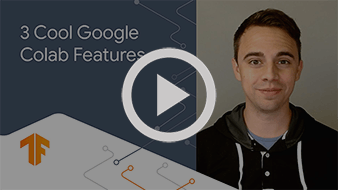
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

In [17]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    cross_validate,
)
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")


sns.set_palette("flare")


In [3]:
!wget https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv

--2024-02-03 18:42:33--  https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276637 (270K) [text/plain]
Saving to: ‘Creditcard_data.csv’

Creditcard_data.csv 100%[===================>] 270.15K  --.-KB/s    in 0.03s   

2024-02-03 18:42:33 (8.54 MB/s) - ‘Creditcard_data.csv’ saved [276637/276637]



In [6]:
data = pd.read_csv("/content/Creditcard_data.csv")
data.drop(["Time"],axis=1,inplace=True)

X = data.drop(["Class"],axis=1)
y = data["Class"]

data.head(30)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


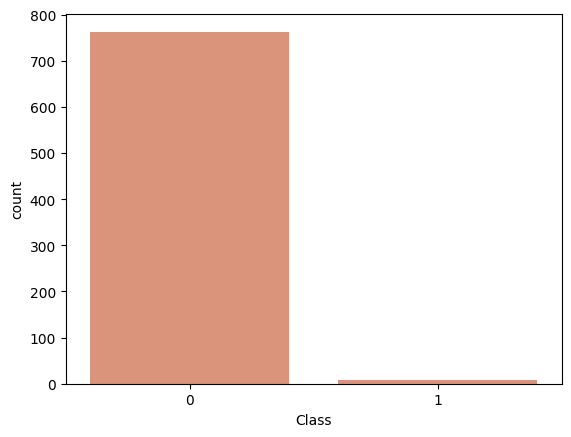

In [7]:
sns.countplot(x=y);

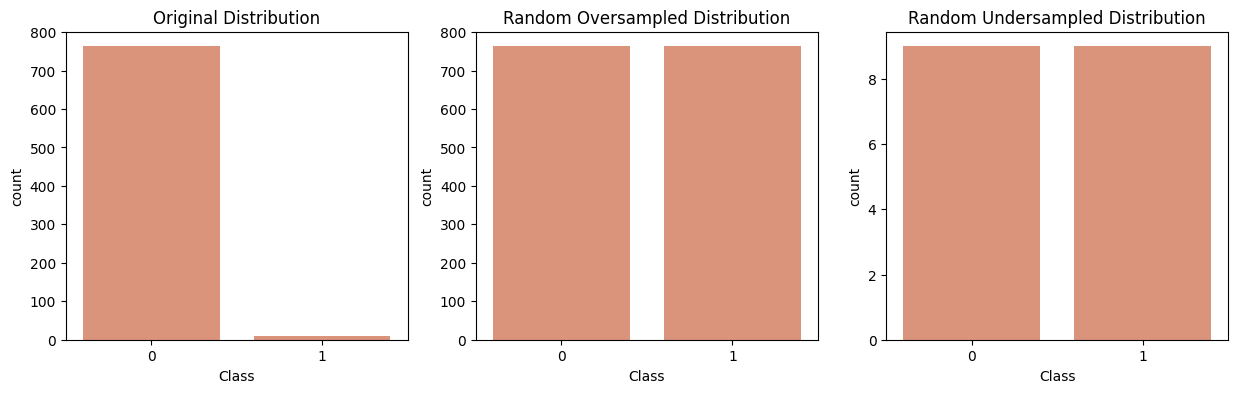

In [8]:

random_over_sampler = RandomOverSampler()
smote = SMOTE()
adasyn = ADASYN()

X_over1, y_over1 = random_over_sampler.fit_resample(X, y)
X_over2, y_over2 = smote.fit_resample(X, y)
X_over3, y_over3 = adasyn.fit_resample(X, y)


X_under, y_under = RandomUnderSampler().fit_resample(X, y)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].set_title("Original Distribution")
sns.countplot(x=y, ax=axes[0])


axes[1].set_title("Random Oversampled Distribution")
sns.countplot(x=y_over1, ax=axes[1])
axes[2].set_title("Random Undersampled Distribution")
sns.countplot(x=y_under, ax=axes[2])

plt.show()


<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

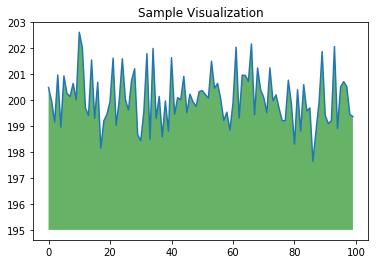

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [9]:
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
lgbm = LGBMClassifier(verbose=-1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Original RF accuracy:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of original KNN:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of original GB:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of original XGB:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of original LGBM:",accuracy_score(lgbm.predict(X_test),y_test))

X_train, X_test, y_train, y_test = train_test_split(X_over1,y_over1, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("RF Accuracy RANDOMLY RESAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("KNN ACCURACY RANDOMLY RESAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("GB Accuracy RANDOMLY RESAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB RANDOM OVERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("LGBM accuracy RANDOMLY EXCEEDED:",accuracy_score(lgbm.predict(X_test),y_test))


X_train, X_test, y_train, y_test = train_test_split(X_over2,y_over2, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("RF Accuracy SMOTE OVERSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("KNN accuracy SMOTE OVERSAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("GB Accuracy SMOTE OVERSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("XGB Accuracy SMOTE OVERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("LGBM Accuracy SMOTE OVERSAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))


X_train, X_test, y_train, y_test = train_test_split(X_over3,y_over3, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("Accuracy of RF ADASYN OVERSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("Accuracy of KNN ADASYN OVERSAMPLED:",accuracy_score(knn.predict(X_test),y_test))
print("Accuracy of GB ADASYN OVERSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("Accuracy of XGB ADASYN OVERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("Accuracy of LGBM ADASYN OVERSAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))

X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size=0.3)

rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

print("\n","-"*30)
print("RF Accuracy RANDOMLY SUBSAMPLED:",accuracy_score(rf.predict(X_test),y_test))
print("KNN ACCURACY RANDOMLY DUMPED:",accuracy_score(knn.predict(X_test),y_test))
print("GB Accuracy RANDOMLY SUBSAMPLED:",accuracy_score(gb.predict(X_test),y_test))
print("XGB Accuracy RANDOMLY UNDERSAMPLED:",accuracy_score(xgb.predict(X_test),y_test))
print("LGBM accuracy RANDOMLY PREDAMPLED:",accuracy_score(lgbm.predict(X_test),y_test))


 ------------------------------
Original RF accuracy: 0.9956896551724138
Accuracy of original KNN: 0.9956896551724138
Accuracy of original GB: 0.9956896551724138
Accuracy of original XGB: 0.9956896551724138
Accuracy of original LGBM: 0.9956896551724138

 ------------------------------
RF Accuracy RANDOMLY RESAMPLED: 1.0
KNN ACCURACY RANDOMLY RESAMPLED: 0.9716157205240175
GB Accuracy RANDOMLY RESAMPLED: 0.9978165938864629
Accuracy of XGB RANDOM OVERSAMPLED: 0.9890829694323144
LGBM accuracy RANDOMLY EXCEEDED: 1.0

 ------------------------------
RF Accuracy SMOTE OVERSAMPLED: 1.0
KNN accuracy SMOTE OVERSAMPLED: 0.925764192139738
GB Accuracy SMOTE OVERSAMPLED: 0.9978165938864629
XGB Accuracy SMOTE OVERSAMPLED: 0.9956331877729258
LGBM Accuracy SMOTE OVERSAMPLED: 0.9956331877729258

 ------------------------------
Accuracy of RF ADASYN OVERSAMPLED: 0.9978213507625272
Accuracy of KNN ADASYN OVERSAMPLED: 0.9281045751633987
Accuracy of GB ADASYN OVERSAMPLED: 0.9956427015250545
Accuracy of XGB